In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from common import Fonts, Images, NWSL, Colors, add_twitter_handle, add_source

In [2]:
# Read data
df = pd.read_csv("data/2022_subs_agg.csv")
df

,team,avg_subs,sub_0_min,sub_1_min,sub_2_min,sub_3_min,sub_4_min,sub_0_count,sub_1_count,sub_2_count,sub_3_count,sub_4_count
0,CHI,4.227273,53.954545,63.681818,71.818182,78.450000,85.428571,22,22,22,20,7
1,HOU,4.500000,57.954545,70.181818,78.818182,82.444444,86.466667,22,22,22,18,15
2,KC,4.227273,55.590909,65.954545,75.526316,79.529412,84.769231,22,22,19,17,13
3,LA,3.363636,52.545455,69.850000,78.882353,86.538462,89.000000,22,20,17,13,2
4,LOU,3.500000,55.181818,69.863636,76.812500,82.583333,84.800000,22,22,16,12,5
5,NC,3.954545,62.500000,72.181818,78.809524,81.714286,82.000000,22,22,21,14,8
6,NJY,4.090909,56.545455,64.863636,73.909091,78.200000,80.777778,22,22,22,15,9
7,ORL,4.409091,51.909091,59.363636,67.285714,76.047619,78.727273,22,22,21,21,11
8,POR,4.090909,59.090909,64.272727,75.954545,81.200000,84.666667,22,22,22,15,9
9,RGN,4.000000,57.909091,68.454545,76.526316,84.000000,86.333333,22,22,19,15,9


In [3]:
# Sort data
df = df.sort_values("sub_0_min", ascending=False).reset_index(drop=True)
df

,team,avg_subs,sub_0_min,sub_1_min,sub_2_min,sub_3_min,sub_4_min,sub_0_count,sub_1_count,sub_2_count,sub_3_count,sub_4_count
0,NC,3.954545,62.500000,72.181818,78.809524,81.714286,82.000000,22,22,21,14,8
1,POR,4.090909,59.090909,64.272727,75.954545,81.200000,84.666667,22,22,22,15,9
2,HOU,4.500000,57.954545,70.181818,78.818182,82.444444,86.466667,22,22,22,18,15
3,RGN,4.000000,57.909091,68.454545,76.526316,84.000000,86.333333,22,22,19,15,9
4,NJY,4.090909,56.545455,64.863636,73.909091,78.200000,80.777778,22,22,22,15,9
5,KC,4.227273,55.590909,65.954545,75.526316,79.529412,84.769231,22,22,19,17,13
6,LOU,3.500000,55.181818,69.863636,76.812500,82.583333,84.800000,22,22,16,12,5
7,WAS,3.818182,54.727273,63.333333,65.500000,73.714286,78.750000,22,21,16,14,8
8,CHI,4.227273,53.954545,63.681818,71.818182,78.450000,85.428571,22,22,22,20,7
9,LA,3.363636,52.545455,69.850000,78.882353,86.538462,89.000000,22,20,17,13,2


<Figure size 5600x4000 with 0 Axes>

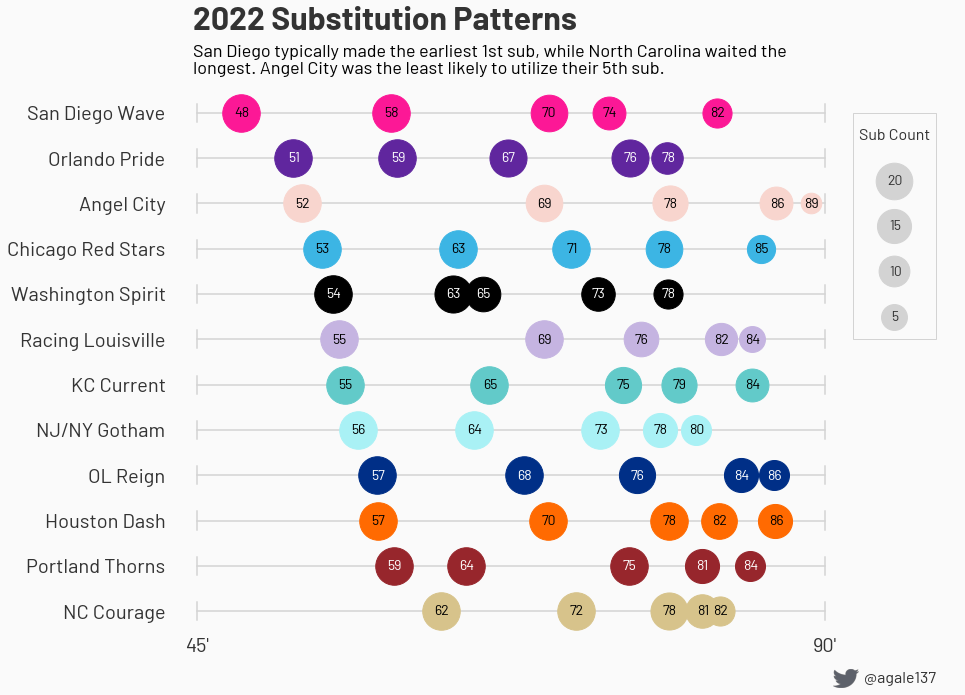

In [13]:
# Setup
plt.rcParams["figure.figsize"] = (14, 10)
plt.figure(dpi=400)
fig, ax = plt.subplots()
fig.patch.set_facecolor(Colors.WHITE)
ax.set_facecolor(Colors.WHITE)

# Plot data
for y, row in df.iterrows():
    # Background timeline
    ax.plot([45, 90], [y, y], color=Colors.LIGHT_GRAY, zorder=1)
    ax.plot([45, 45], [y - 0.2, y + 0.2], color=Colors.LIGHT_GRAY, zorder=1)
    ax.plot([90, 90], [y - 0.2, y + 0.2], color=Colors.LIGHT_GRAY, zorder=1)

    for x, i in [(row["sub_" + str(i) + "_min"], i) for i in range(0, 5)]:
        label = str(int(x))
        if row["team"] == "NC" and i == 3:
            x = x - 0.5
        elif row["team"] == "NC" and i == 4:
            x = x + 0.5
        ax.scatter(
            [x],
            [y],
            color=NWSL.color(row["team"]),
            s=row["sub_" + str(i) + "_count"] ** 0.5 * 300,
            zorder=2,
        )
        ax.text(
            x + 0.05,
            y - 0.01,
            label,
            ha="center",
            va="center",
            color=NWSL.text_color(row["team"]),
            fontproperties=Fonts.BARLOW,
            fontsize=14,
        )

# Legend

s = [5, 10, 15, 20]
x = 95
y = 6.5
ax.add_patch(
    Rectangle((x - 3, y-0.5), 6, 5, edgecolor=Colors.LIGHT_GRAY, fill=False, lw=1)
)
for i in range(0, len(s)):
    ax.scatter(
        [x],
        [y + i],
        color=Colors.LIGHT_GRAY,
        s=s[i] ** 0.5 * 300,
        zorder=2,
    )
    ax.text(
        x + 0.05,
        y + i - 0.01,
        str(s[i]),
        ha="center",
        va="center",
        color=Colors.BLACK,
        fontproperties=Fonts.BARLOW,
        fontsize=14,
    )

ax.text(
    x,
    y + len(s),
    "Sub Count",
    ha="center",
    va="center",
    color=Colors.BLACK,
    fontproperties=Fonts.BARLOW,
    fontsize=16,
)

# Axes
ax.set_xlim([43, 99])
ax.set_xticks([45, 90])
ax.set_xticklabels(
    ["45'", "90'"], fontproperties=Fonts.BARLOW, size=20, color=Colors.BLACK
)

ax.set_ylim([-0.5, 11.5])
ax.set_yticks(range(0, 12))
ax.set_yticklabels(
    df["team"].apply(lambda x: NWSL.name(x)),
    fontproperties=Fonts.BARLOW,
    size=20,
    color=Colors.BLACK,
)
ax.tick_params(axis="both", which="major", length=0)
ax.spines[["top", "right", "left", "bottom"]].set_visible(False)

# Title
plt.title(
    "2022 Substitution Patterns",
    fontproperties=Fonts.BARLOW_BOLD,
    size=32,
    x=0.03,
    y=1.1,
    ha="left",
    color=Colors.BLACK,
)

# Subtitle
ax.text(
    0.03,
    1.03,
    "San Diego typically made the earliest first sub, while North Carolina waited the\nlongest. Angel City was the least likely to utilize their fifth sub.",
    fontproperties=Fonts.BARLOW,
    size=18,
    ha="left",
    transform=ax.transAxes,
)

add_twitter_handle(fig, x=0.78, y=0.05, fs=16, w=0.028)

# Save image
plt.savefig(
    "images/2022_substitutes.png",
    bbox_inches="tight",
    pad_inches=0.5,
    dpi=400
)